In [1]:
#pip install kaggle
#pip install scipy
# make sure /root/.kaggle/kaggle.json is there
# kaggle competitions download -c dogs-vs-cats

import os, shutil

original_dataset_dir = '/root/train'

base_dir = '/root/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')


os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)

os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)

os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

FileExistsError: [Errno 17] File exists: '/root/cats_and_dogs_small'

In [2]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [3]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [6]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=30, 
                              validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 13s 83ms/step - loss: 0.6904 - acc: 0.5323 - val_loss: 0.6724 - val_acc: 0.5760
Epoch 2/30
100/100 [==============================] - 8s 78ms/step - loss: 0.6386 - acc: 0.6076 - val_loss: 0.6371 - val_acc: 0.6250
Epoch 3/30
100/100 [==============================] - 8s 78ms/step - loss: 0.5888 - acc: 0.6841 - val_loss: 0.6002 - val_acc: 0.6700
Epoch 4/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5527 - acc: 0.7156 - val_loss: 0.5911 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 8s 78ms/step - loss: 0.5441 - acc: 0.7446 - val_loss: 0.5756 - val_acc: 0.6860
Epoch 6/30
100/100 [==============================] - 8s 77ms/step - loss: 0.4911 - acc: 0.7730 - val_loss: 0.5859 - val_acc: 0.6850
Epoch 7/30
100/100 [==============================] - 8s 77ms/step - loss: 0.4732 - acc: 0.7786 - val_loss: 0.5896 - val_acc: 0.6770
Epoch 8/30
100/100 [==============================] - 8s 78ms/step -

In [7]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

321


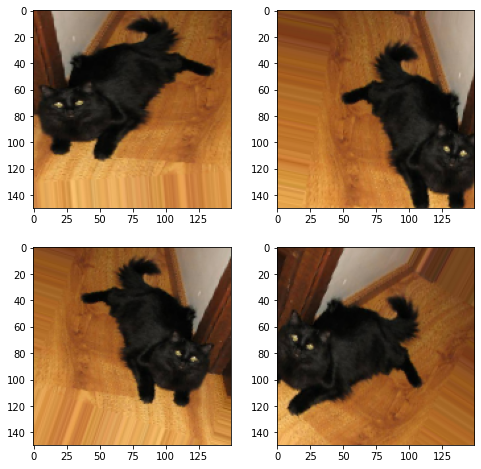

In [91]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import random

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

randint = random.randrange(len(fnames))
print(randint)

img_path = fnames[391]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

plt.figure(figsize=(8, 8))

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2, 2, i+1)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [29]:
train_datagen = ImageDataGenerator(rescale=1./255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,)
                            #fill_mode='nearest')
    
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

history = model.fit(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 24s 242ms/step - loss: 0.6872 - acc: 0.5335 - val_loss: 0.6816 - val_acc: 0.5140
Epoch 2/100
100/100 [==============================] - 23s 231ms/step - loss: 0.6731 - acc: 0.5770 - val_loss: 0.6576 - val_acc: 0.5770
Epoch 3/100
100/100 [==============================] - 27s 271ms/step - loss: 0.6571 - acc: 0.6050 - val_loss: 0.6470 - val_acc: 0.6090
Epoch 4/100
100/100 [==============================] - 23s 234ms/step - loss: 0.6441 - acc: 0.6040 - val_loss: 0.6538 - val_acc: 0.6170
Epoch 5/100
100/100 [==============================] - 19s 190ms/step - loss: 0.6231 - acc: 0.6400 - val_loss: 0.6096 - val_acc: 0.6540
Epoch 6/100
100/100 [==============================] - 18s 185ms/step - loss: 0.6187 - acc: 0.6500 - val_loss: 0.5927 - val_acc: 0.6780
Epoch 7/100
100/100 [==============================] - 21s 208ms/step - loss: 0.6108 - acc: 0.6555 -

In [30]:
model.save('cats_and_dogs_small_2.h5')